Miraslau Alkhovk, 248655, EAiBD gr. 2, AD_lab, 26.12.2024

In [192]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [3]:
df = pd.read_csv('statlog.csv')

# 1. Opis zbioru danych oraz problemu

Zbiór danych "Statlog (Heart)" zawiera informacje medyczne dotyczące pacjentów. Celem projektu jest stworzenie modelu klasyfikacji, który na podstawie wybranych cech danych dotyczących zdrowia pacjentów przewiduje obecność choroby serca.

Cechy:
1. age - Wiek pacjenta (numeryczna).
2. sex - Płeć pacjenta (binarna: 0 = kobieta, 1 = mężczyzna).
3. cp - Typ bólu w klatce piersiowej (1-4, nominalna).
4. trestbps - Ciśnienie krwi (numeryczna).
5. chol - Cholesterol w surowicy (numeryczna).
6. fbs - Cukier na czczo > 120 mg/dl (binarna: 0 = Nie, 1 = Tak).
7. restecg - Wynik EKG (nominalna: 0, 1, 2).
8. thalach - Maksymalna częstotliwość akcji serca (numeryczna).
9. exang - Dusznica wysiłkowa (binarna: 0 = Nie, 1 = Tak).
10. oldpeak - Depresja odcinka ST (numeryczna).
11. slope - Nachylenie odcinka ST (1-3, nominalna).
12. ca - Liczba głównych naczyń (0-3, nominalna).
13. thal - Wynik testu Thal (3 = normalny, 6 = stały defekt, 7 = odwracalny defekt).
14. presence - Choroba serca (binarna: 1 = brak, 2 = obecność).

Źródło danych:

Zbiór danych pochodzi z https://www.kaggle.com/datasets/shubamsumbria/statlog-heart-data-set


In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,presence
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1


# 2. Podstawowe statystyki oraz czyszczenie dancyh

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
presence    0
dtype: int64

In [8]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
presence    0
dtype: int64

## Wynik
Wszystkie kolumny mają 0 braków (null i NA), więc czyszczenie nie jest potrzebne. Dane są gotowe do przetwarzania.

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,presence
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,1.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,2.000000


# 3. Wizualizacja dancyh oraz wybór cech

## 3.1 Wykres słupkowy korelacji

Jest to **wykres słupkowy korelacji** między poszczególnymi cechami (kolumnami) a zmienną docelową 'presence' (obecność choroby serca).
Po osi X znajdzują się wszystkie dostępne cechy w zbiorze danych, takie jak 'age', 'sex', 'cp', 'thalach', itp. Po osi Y (korelacja) są
wartości korelacji Pearsona między cechami a zmienną 'presence'. Wartości dodatnie wskazują pozytywną korelację (większa wartość cechy
zwiększa prawdopodobieństwo klasy 'presence=2'). Natomiast wartości ujemne wskazują negatywną korelację (większa wartość cechy zmniejsza 
prawdopodobieństwo klasy 'presence=2'). Na danym wykresie można zaobserwować:

- **Najsilniejsze korelacje dodatnie**:
     - 'thal': ~0.54 (najsilniejsza dodatnia korelacja z 'presence').
     - 'ca': ~0.46.
     - 'oldpeak': ~0.42.
- **Najsilniejsza korelacja ujemna**:
     - 'thalach': ~-0.42.

Ten rodzaj wykres został wybrany w pierwszej kolejności ponieważ daje on ogólny obraz istotności cech, co pozwala zrozumieć dane bez potrzeby budowy modeli na tym etapie. Jest on przydatny w identyfikowaniu cech dla dalniejszej pracy nad modelem predykcji.

<Axes: title={'center': 'Korelacja ze zmienną docelową'}>

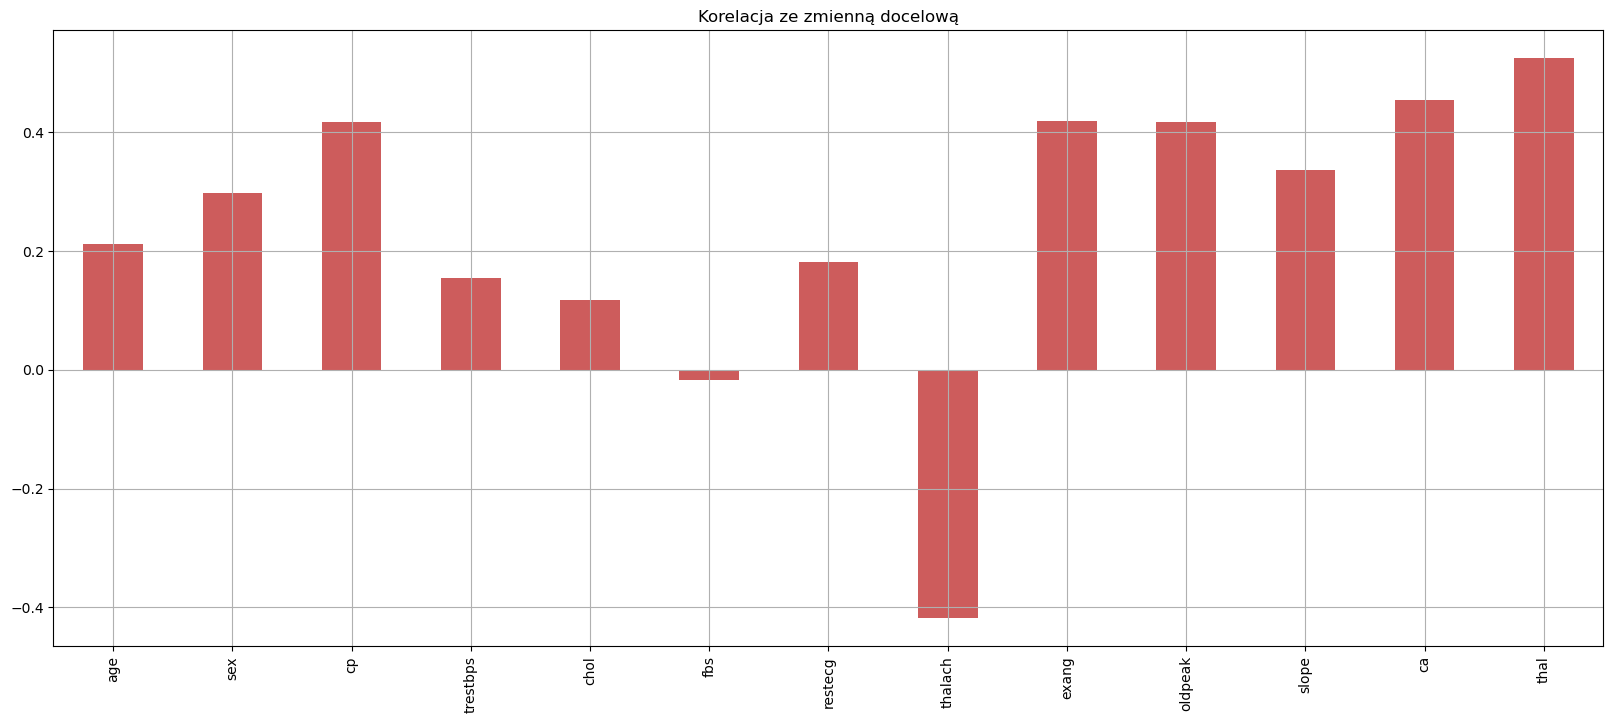

In [137]:
df.drop('presence', axis=1).corrwith(df.presence).plot(kind='bar', grid=True, figsize=(20, 8), title="Korelacja ze zmienną docelową",
                                                       color="indianred")


## 3.2 Wykresy pudełkowe dla wybranych cech
Na podstawie wykresu słupkowego korelacji zauważono, że cechy thal, ca, oldpeak, thalach, i cp mają najwyższe wartości korelacji (dodatniej lub ujemnej) z cechą docelową presence. Dlatego zdecydowano się na szczegółowe zbadanie tych cech za pomocą wykresów box plot, które pokazują, jak ich wartości różnią się między klasami (presence = 1 – brak choroby, presence = 2 – choroba).

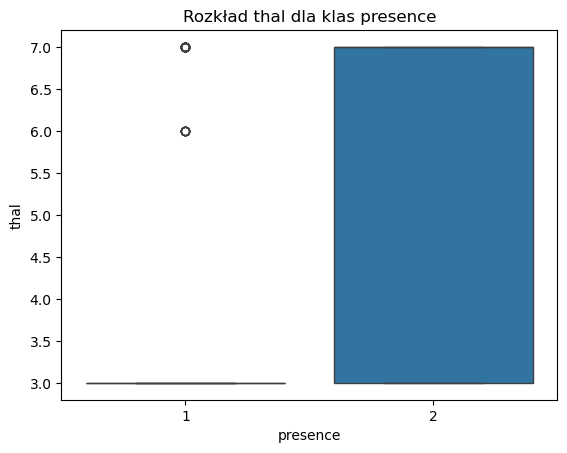

In [140]:
features = ['thal', 'cp', 'ca', 'thalach', 'oldpeak', 'exang']
#cp, exang, oldpreak, ca, , thalach
sns.boxplot(x='presence', y=features[0], data=df)
plt.title(f'Rozkład {features[0]} dla klas presence')
plt.show()

### 3.2.1 Thal:

Dla klasy presence = 1 (brak choroby): większość wartości wynosi 3.
Dla klasy presence = 2 (choroba): dominują wartości 6 i 7.

Thal wydaje się być bardzo istotną cechą diagnostyczną, ponieważ wyraźnie różni się między klasami. Wyższe wartości thal (np. 6 i 7) są silnie związane z obecnością choroby serca.

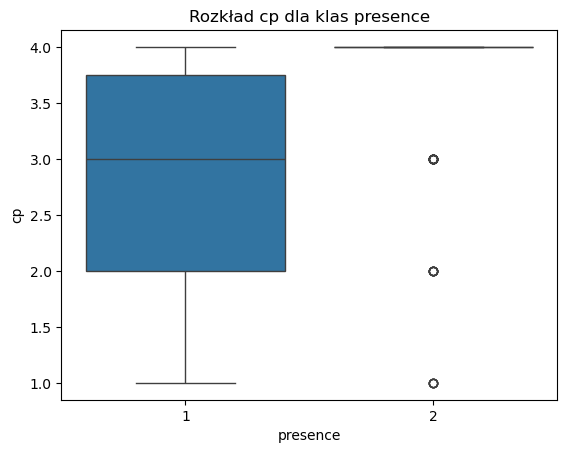

In [141]:
sns.boxplot(x='presence', y=features[1], data=df)
plt.title(f'Rozkład {features[1]} dla klas presence')
plt.show()

### 3.2.2 CP:
Dla klasy presence = 1 (brak choroby), większość wartości cp mieści się w zakresie od 1 do 3, z medianą bliską 3.
Dla klasy presence = 2 (choroba) wartości są bardziej zróżnicowane, ale pojawiają się wartości maksymalne bliskie 4.

Typ bólu w klatce piersiowej jest ważnym czynnikiem, ponieważ istnieje widoczna różnica w rozkładach między klasami.


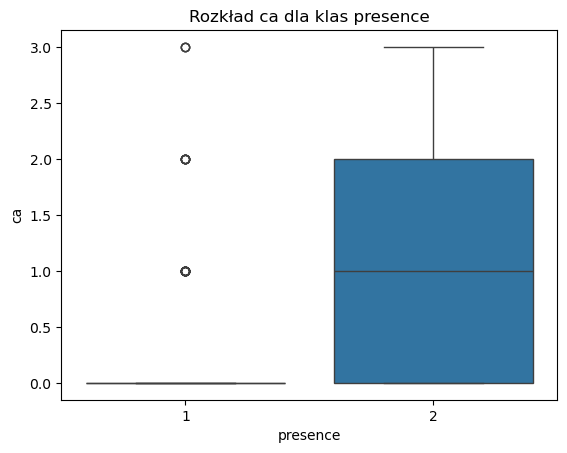

In [142]:
sns.boxplot(x='presence', y=features[2], data=df)
plt.title(f'Rozkład {features[2]} dla klas presence')
plt.show()

### 3.2.3 CA:
Dla klasy presence = 1 większość wartości wynosi 0.
Dla klasy presence = 2 wartości są bardziej zróżnicowane, z przewagą wyższych wartości (np. 2, 3).

CA jest istotnym wskaźnikiem, ponieważ wyższe wartości wyraźnie wskazują na obecność choroby.


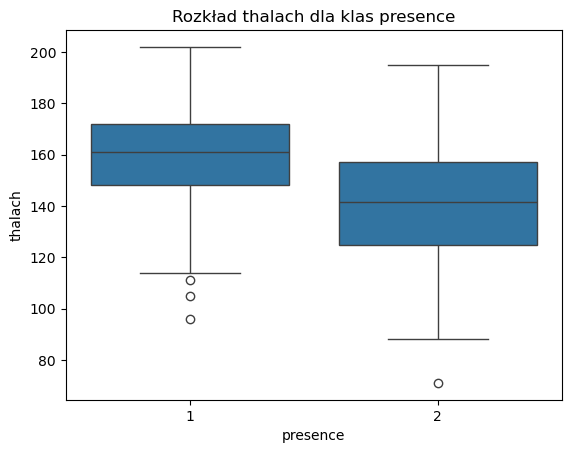

In [143]:
sns.boxplot(x='presence', y=features[3], data=df)
plt.title(f'Rozkład {features[3]} dla klas presence')
plt.show()

### 3.2.4 Thalach:

Dla klasy presence = 1 wartości są wyższe (głównie powyżej 150).
Dla klasy presence = 2 wartości są niższe (często poniżej 140).

Warto wziąć pod uwagę tę cechę, ponieważ thalach ma wyraźny podział między klasami i może pomóc w klasyfikacji, zwłaszcza dla modeli 
liniowych.

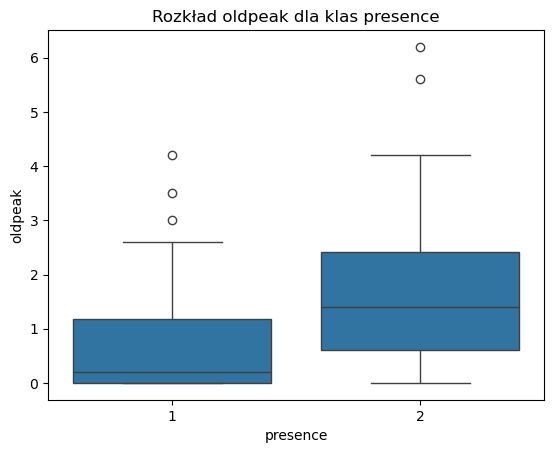

In [144]:
sns.boxplot(x='presence', y=features[4], data=df)
plt.title(f'Rozkład {features[4]} dla klas presence')
plt.show()

### 3.2.5 Oldpeak:

Dla klasy presence = 1 wartości są bliskie 0, a maksymalne wynoszą około 2.
Dla klasy presence = 2 wartości są wyższe (często powyżej 1, z maksymalnymi nawet do 6).

Oldpeak jest istotną cechą, ponieważ różnica między klasami jest wyraźna, a wyższe wartości wskazują na większe ryzyko choroby.

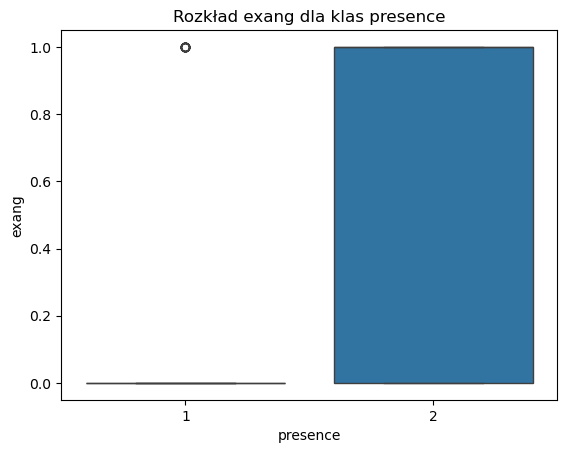

In [145]:
sns.boxplot(x='presence', y=features[5], data=df)
plt.title(f'Rozkład {features[5]} dla klas presence')
plt.show()

### 3.2.6 Exang

Dla klasy presence = 1 większość wartości wynosi 0 (brak bólu wysiłkowego).
Dla klasy presence = 2 wartości wynoszą głównie 1 (ból wysiłkowy obecny).

Exang pokazuje wyraźne różnice między klasami i może być istotnym wskaźnikiem w modelach klasyfikacyjnych.

</br>

---

## 3.3 Heatmapa korelacji

Następnie, dla redukcji niepotrzebynch czynników, które zostaną wykorzystane w modelu klasyfikacynjym, wygenerowano heatmapę korelacji. Oto 
są obserwacje:

</br>

- Cechy do uwzględnienia w modelu:
    - thal (0.53):
        - Najsilniejsza korelacja z presence. Kluczowa cecha.
    - ca (0.46):
        - Istotna cecha, wyraźnie różnicuje klasy.
    - oldpeak (0.42):
        - Silny związek z cechą docelową, pomocna w modelach.
    - cp (0.42):
        - Ważna cecha, szczególnie w kombinacji z innymi.
    - exang (0.42):
       - Ból wysiłkowy ma znaczenie w klasyfikacji.
 </br>                                                                                               

- Cechy do potencjalnej redukcji:
    - thalach (-0.42):
        - Mimo istotnej korelacji z presence, jest ujemna i może być trudniejsza do interpretacji.

 </br>                                                                                               


Jednak podjęto decyzję pozostawić tę cechę, ponieważ planowany modele powinny radzić sobie ujemnymi korelacjami (np. regresja logistyczna).

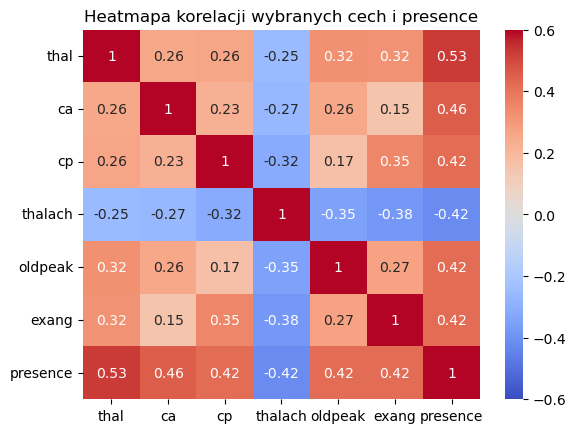

In [155]:
selected_features = df[['thal', 'ca', 'cp', 'thalach', 'oldpeak', 'exang', 'presence']]
sns.heatmap(selected_features.corr(), annot=True, cmap='coolwarm', vmin = -0.6, vmax = 0.6)
plt.title('Heatmapa korelacji wybranych cech i presence')
plt.show()

# 4. Tworzenie modelu i ocena

## 4.1 Podział danych na zbiór treningowy i testowy

Zbiór został podzielony na treningowy i testowy w proporcji 80% treningowy i 20 testowy. Dany zbiór nie jest duży, więc proporcja 80%-20% dobrze balansuje między treningiem a testowaniem. Taka proporcja zapewnia wystarczającą liczbę próbek do nauki modelu i niezależny zbiór do oceny jego wydajności. Parametr ‘random_state’ = 42 zapewnia powtarzalność wyników. Dzięki temu podział danych jest zawsze taki sam przy kolejnych uruchomieniach kodu, co umożliwia porównanie modeli i wyników.
 
 
Wykorzystano również funkcję MinMaxScaler, która przekształca wartości cech na przedział [0, 1]. Taka normalizacja została wprowadzona, ponieważ są cechy o różnych zakresach wartości. Na przykład: ‘thalach’ (od 70 do 200) i ‘ca’ (od 0 do 3). 

Następnie zbiór treningowy został przeskalowany. Skalowanie jest dopasowywane tylko na podstawie danych treningowych, aby uniknąć wycieku informacji z danych testowych do treningowych. Dodatkowo, zbiór testowy jest przekształcany (funkcja ’transform’) przy użyciu tych samych minimum i maksimum co zbiór treningowy.

In [210]:
X = df[['thal', 'ca', 'cp', 'thalach', 'oldpeak', 'exang']]
y = df['presence']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

print("Rozmiar zbioru treningowego:", X_train.shape)
print("Rozmiar zbioru testowego:", X_test.shape)

Rozmiar zbioru treningowego: (216, 6)
Rozmiar zbioru testowego: (54, 6)


## 4.2 Regresja logistyczna

Wyniki dokładności modelu pokazują, że model dobrze radzi sobie na zbiorze treningowym. Dokładność na zbiorze treningowym wyniosła 83.8%, a na zbiorze testowym 92.6%. To oznacza, że model nie jest przeuczony i skutecznie rozpoznaje wzorce w danych. 

Przykład predykcji:
* Predykcje modelu: [2, 2, 1, 1, 1, 2, 1, 1, 1, 1]
* Rzeczywiste wartości: [2, 2, 1, 1, 1, 2, 1, 1, 1, 1]

Model poprawnie przewiduje większość wartości, co potwierdza jego skuteczność.

Wyniki macierzy pomyłek:
* Prawidłowe predykcje:
    * 33 przypadków (True Positive - TP): Brak choroby prawidłowo sklasyfikowany jako brak choroby.
    * 17 przypadków (True Negative - TN): Choroba prawidłowo sklasyfikowana jako choroba.
* Błędne predykcje:
    * 0 przypadki (False Positive - FP): Brak choroby błędnie sklasyfikowany jako choroba.
    * 4 przypadków (False Negative - FN): Choroba błędnie sklasyfikowana jako brak choroby.

Wnioski z macierzy pomyłek:
* FN (False Negative): Model błędnie klasyfikuje 3 przypadków choroby jako brak choroby, co w praktyce medycznej może być istotnym problemem.
* FP (False Positive) i TP (True Positive): Brak FP oraz TP = 33 sugeruje, że model perfekcyjnie klasyfikuje przypadki braku choroby.
* Model generalnie lepiej rozpoznaje przypadki braku choroby (0), co widać po liczbie TP (33) w porównaniu do TN (17).



In [211]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

logreg_train_score = logreg.score(X_train, y_train)
logreg_test_score = logreg.score(X_test, y_test)

print("Regresja logistyczna - dokładność na treningowym:", logreg_train_score)
print("Regresja logistyczna - dokładność na testowym:", logreg_test_score)

Regresja logistyczna - dokładność na treningowym: 0.8379629629629629
Regresja logistyczna - dokładność na testowym: 0.9259259259259259


In [212]:
y_pred = logreg.predict(X_test)
print("Przykład predykcji:", y_pred[:10])
print("Rzeczywiste wartoś:", y_test[:10].values)

Przykład predykcji: [2 2 1 1 1 2 1 1 1 1]
Rzeczywiste wartoś: [2 2 1 1 1 2 1 1 1 1]


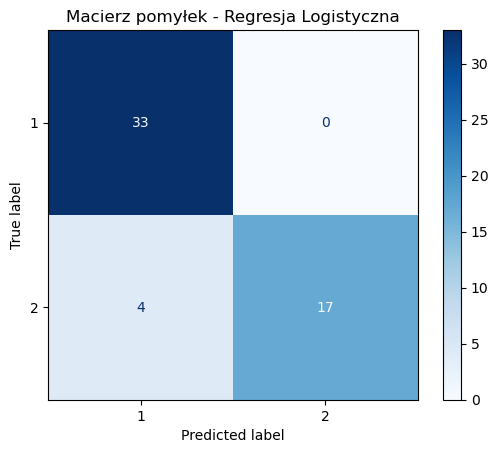

In [213]:
cm_logreg = confusion_matrix(y_test, y_pred)
disp_logreg = ConfusionMatrixDisplay(confusion_matrix=cm_logreg, display_labels=[1, 2])
disp_logreg.plot(cmap='Blues')
plt.title('Macierz pomyłek - Regresja Logistyczna')
plt.show()

## 4.3 Drzewo decyzyjne

Wyniki dokładności modelu wskazują że model osiąga dobrą wydajność na obu zbiorach, co sugeruje, że wybrane parametry (max_depth = 4, min_samples_leaf = 6) skutecznie balansują między przeuczeniem a niedouczeniem.
Dokładność na zbiorze treningowym wyniosła 86.6%, a na testowym 85.2%. Natomiast, Niższa dokładność na zbiorze testowym w porównaniu do regresji logistycznej (92.6%) wskazuje, że model drzewa może być mniej dokładny w tym przypadku.

Przykład predykcji:
* Predykcje modelu drzewa: [2, 2, 1, 1, 1, 2, 2, 1, 1, 1]
* Rzeczywiste wartości: [2, 2, 1, 1, 1, 2, 1, 1, 1, 1]

Widać, że model poprawnie przewiduje większość wartości, jednak błędnie klasyfikuje próbkę 7, gdzie powinno być 1, ale przewidziano 2.

Wyniki macierzy pomyłek:
* Prawidłowe predykcje:
    * 30 przypadków (True Positive - TP): Brak choroby prawidłowo sklasyfikowany jako brak choroby.
    * 16 przypadków (True Negative - TN): Choroba prawidłowo sklasyfikowana jako choroba.
* Błędne predykcje:
    * 3 przypadki (False Positive - FP): Brak choroby błędnie sklasyfikowany jako choroba.
    * 5 przypadków (False Negative - FN): Choroba błędnie sklasyfikowana jako brak choroby.

 
Model poprawnie klasyfikuje większość przypadków, ale:
* Popełnia 3 błędy False Positive, czyli błędnie klasyfikuje brak choroby jako chorobę.
* Ma 5 błędów False Negative, czyli nie wykrywa 5 przypadków choroby.

W porównaniu do regresji logistycznej, drzewo decyzyjne jest mniej dokładne w obu klasach.



In [214]:
tree = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 6, random_state=42)
tree.fit(X_train, y_train)

tree_train_score = tree.score(X_train, y_train)
tree_test_score = tree.score(X_test, y_test)

print("Drzewo decyzyjne - dokładność na treningowym:", tree_train_score)
print("Drzewo decyzyjne - dokładność na testowym:", tree_test_score)

Drzewo decyzyjne - dokładność na treningowym: 0.8657407407407407
Drzewo decyzyjne - dokładność na testowym: 0.8518518518518519


In [215]:
y_pred = tree.predict(X_test)
print("Przykład predykcji:", y_pred[:10])
print("Rzeczywiste wartoś:", y_test[:10].values)

Przykład predykcji: [2 2 1 1 1 2 2 1 1 1]
Rzeczywiste wartoś: [2 2 1 1 1 2 1 1 1 1]


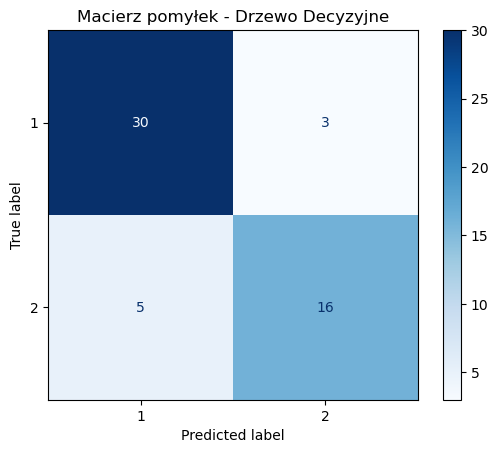

In [216]:
cm_tree = confusion_matrix(y_test, y_pred)
disp_tree = ConfusionMatrixDisplay(confusion_matrix=cm_tree, display_labels=[1, 2])
disp_tree.plot(cmap='Blues')
plt.title('Macierz pomyłek - Drzewo Decyzyjne')
plt.show()

## 4.4 Porównanie algorytmów: Regresja Logistyczna vs Drzewo Decyzyjne

- Wyniki dokładności na zbiorze testowym
    - Regresja logistyczna: 92.6%
    - Drzewo decyzyjne: 85.2%

Z poniższego wykresu wynika, że regresja logistyczna osiągnęła wyższą dokładność na zbiorze testowym. Różnica wynosi 7.4%, co czyni regresję logistyczną bardziej precyzyjnym modelem w tym przypadku.

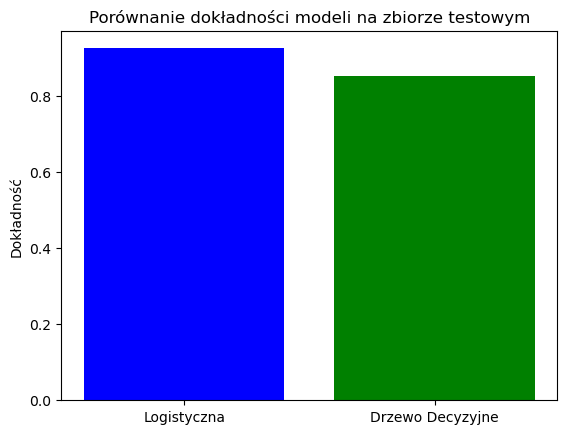

In [186]:
models = ['Logistyczna', 'Drzewo Decyzyjne']
scores = [logreg_test_score, tree_test_score]

plt.bar(models, scores, color=['blue', 'green'])
plt.title('Porównanie dokładności modeli na zbiorze testowym')
plt.ylabel('Dokładność')
plt.show()

## 4.5 Porównywanie wyników raportu klasyfikacji dwóch algorytmów:

- Precision:
    - Regresja logistyczna dla klasy 2 (Choroba) osiągnęła perfekcyjne Precision (1.00), co oznacza brak błędów False Positive.
Drzewo decyzyjne ma niższe Precision dla obu klas.

- Recall:
    - Regresja logistyczna dla klasy 1 (Brak choroby) osiąga perfekcyjny wynik 1.00, ale Recall dla klasy 2 (Choroba) jest niższy (0.81).
Drzewo decyzyjne lepiej radzi sobie z klasą 1 niż klasą 2, gdzie Recall wynosi tylko 0.76.

- F1-Score:
    - Regresja logistyczna jest bardziej zrównoważona (F1 wynosi 0.94 dla klasy 1 i 0.89 dla klasy 2).
Drzewo decyzyjne uzyskuje niższe F1, zwłaszcza dla klasy 2 (0.80).
</br>

---

- Podsumowanie:

    - Regresja logistyczna:
        - Model ma wyższą dokładność i lepsze wskaźniki Precision oraz F1-Score. Dobrze rozróżnia klasy, szczególnie brak choroby, gdzie osiąga perfekcyjne wyniki.

    - Drzewo decyzyjne:

        - Model jest prostszy do interpretacji, ale ma problemy z klasyfikacją klasy 2 (Choroba). Niższe wskaźniki Precision i Recall w tej klasie sprawiają, że model mniej skutecznie wykrywa osoby chore.


In [218]:
print("Regresja logistyczna:")
print(classification_report(y_test, logreg.predict(X_test)))

print("Drzewo decyzyjne:")
print(classification_report(y_test, tree.predict(X_test)))

Regresja logistyczna:
              precision    recall  f1-score   support

           1       0.89      1.00      0.94        33
           2       1.00      0.81      0.89        21

    accuracy                           0.93        54
   macro avg       0.95      0.90      0.92        54
weighted avg       0.93      0.93      0.92        54

Drzewo decyzyjne:
              precision    recall  f1-score   support

           1       0.86      0.91      0.88        33
           2       0.84      0.76      0.80        21

    accuracy                           0.85        54
   macro avg       0.85      0.84      0.84        54
weighted avg       0.85      0.85      0.85        54



# 5. Podsumowanie oraz wnioski

Celem danego projektu było zaprojektowanie modelu klasyfikacji, który na na podstawie wybranych cech danych dotyczących zdrowia pacjentów robi predykcje obecności choroby serca. Zanim model został stworzony, dane zostały dokładnie opisane oraz wizualnie przeanalizowane,  co pomogło wybrać kluczowe cechy do klasyfikacji. Najbardziej istotne cechy w przewidywaniu choroby to: thal, ca, oldpeak, exang, cp. Cecha thalach miała mniejsze znaczenie w porównaniu do innych cech i mogłaby zostać odrzucona w przyszłych iteracjach. Następnie dane zostały podzielone na zbiór treningowy i testowy oraz znormalizowane. Wytrenowano dwa modele klasyfikacji: regresję logistyczną i drzewo decyzyjne, a następnie porównano ich wydajność: 

- Regresja logistyczna okazała się bardziej skuteczna, osiągając dokładność na zbiorze testowym równą 92.6%, z lepszymi wskaźnikami Precision, Recall i F1-Score.
- Drzewo decyzyjne miało dokładność 85.2%, ale było mniej skuteczne w klasyfikacji klasy 2 (choroba), co wskazuje na potrzebę optymalizacji lub zastosowania bardziej zaawansowanego modelu.

W celu poprawianiu dokładności modelu można by było zoptymalizować hiperparametry dla obu modeli, zastosować bardziej zaawansowane modeli (RandomForest, SVM, itp.), albo wprowadzić krosswalidację.  W projekcie udało się stworzyć model klasyfikacji o wysokiej dokładności, który może być przydatny w identyfikacji pacjentów z ryzykiem choroby serca. Regresja logistyczna okazała się najlepszym modelem w tej iteracji projektu. Wyniki wskazują na potencjał dalszego rozwijania modeli i zastosowania bardziej zaawansowanych metod analizy danych.